# Data wrangling


In this project we will be wrangling (and analyzing and visualizing) a tweet archive of Twitter user @dog_rates, also known as WeRateDogs dataset.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
% matplotlib inline

# Gather

In [2]:
# read WeRateDogs Twitter archive file
Twi_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download image-predictions programmatically using the Requests Library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)


In [4]:
# check if the tsv file was downloaded
img_pre = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) '''

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tw

In [6]:
# read tweet-json.txt file line by line into a pandas DataFrame 
# Source: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
data_list = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
            tweets = json.loads(line)
            data_list.append(tweets)
        
api_df = pd.DataFrame(data_list, columns=list(data_list[0]))

api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [7]:
# Read only ID, retweet count, and favorite count columns
json_tweet = api_df[['id', 'retweet_count', 'favorite_count']]
json_tweet.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [8]:
# To display text clearly in the dfs
pd.set_option('display.max_colwidth', -1)

# Assess

Assess data visually and programmatically for quality and tidiness issues. 

### 1. Twitter Archive Enhanced

- Visual assessment

In [9]:
Twi_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [10]:
Twi_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947667116034/photo/1,11,10,a,None,None,None,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hunter. He was playing with his ball minding his own business. Has no idea what happened to the carpet. 8/10 https://t.co/DbUTDI3u1R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593985699840/photo/1,8,10,Hunter,None,None,None,None
2213,668567822092664832,NaN,NaN,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668567822092664832/photo/1,11,10,Marvin,None,None,None,None
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1",13,10,Alfy,None,None,None,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446468493312/photo/1,9,10,None,None,None,None,None


In [11]:
Twi_arc.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

- Programmatic assessment

In [12]:
Twi_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
Twi_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#check for any duplicated records
sum(Twi_arc.duplicated())

0

In [15]:
sum(Twi_arc['tweet_id'].duplicated())

0

In [16]:
#Check the numerator and count
Twi_arc.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [17]:
# find decimal ratings
Twi_arc[Twi_arc.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [18]:
# inspect one row more clearly
# the rating extracted incorrectly from the text
Twi_arc[Twi_arc['tweet_id']==786709082849828864].text

695    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object

In [19]:
# have insight to all denominator unique values
Twi_arc.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
# to know the number of records which include denoinmator !=10
Twi_arc.query('rating_denominator != 10').rating_denominator.count()

23

In [21]:
# view the exact rows for further investigation
Twi_arc.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [22]:
Twi_arc.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [23]:
# To check if more than one dog description presented in doggo	floofer	pupper	puppo columns
Twi_arc.query('doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/85

### Data quality and tidiness issues

#### Quality
- <font color='red'>23 records include a rating denominator which doesn't equal to 10.</font> (Validity)
- <font color='red'>Rating Numerator in 6 cases was extracted incorrectly from the tweets text.</font> (Validity)
- <font color='red'>181 records are not original tweets -retweeted- </font> (Consistency)
- <font color='red'>Some columns need to be renamed.</font> (Consistency)
- <font color='red'>timestamp & retweeted_status_timestamp not on datetime datatype.</font> (Consistency)
- <font color='red'>Some dogs names seems wrong.</font> (Accuracy)
- <font color='red'>Rating numerator and denominator should be in float datatype due to the fact that some rows have decimal values.</font> (Accuracy)

#### Tidiness
- <font color='red'>Some records have multiple dog description. </font>
- <font color='red'>Doggo, Floof, Pupper & Puppo should be represented in one column.</font> 

### 2. Image Predictions

- Visual assessment

In [24]:
img_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
img_pre.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Programmatic assessment

In [26]:
img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
img_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
sum(img_pre.duplicated())

0

In [29]:
# check of any image is duplicated or original
sum(img_pre['jpg_url'].duplicated())

66

In [30]:
# see the level of accuracy of neural network prediction (p1)
img_pre.groupby('p1_dog')['p1_conf'].describe()

,count,mean,std,min,25%,50%,75%,max
p1_dog,,,,,,,,
False,543.0,0.540167,0.294639,0.059033,0.280340,0.493257,0.821904,1.000000
True,1532.0,0.613823,0.259735,0.044333,0.390981,0.614025,0.850559,0.999956


In [31]:
img_pre.p1.nunique()

378

In [32]:
# see the most predictied object in case of dog or not dog (p1)
img_pre.groupby('p1_dog')['p1'].describe()

,count,unique,top,freq
p1_dog,,,,
False,543,267,seat_belt,22
True,1532,111,golden_retriever,150


In [33]:
# see the most predictied object in case of dog or not dog (p2)
img_pre.groupby('p2_dog')['p2'].describe()

,count,unique,top,freq
p2_dog,,,,
False,522,292,seat_belt,12
True,1553,113,Labrador_retriever,104


In [34]:
# see the most predictied object in case of dog or not dog (p3)
img_pre.groupby('p3_dog')['p3'].describe()

,count,unique,top,freq
p3_dog,,,,
False,576,292,doormat,16
True,1499,116,Labrador_retriever,79


### Data quality and tidiness issues

#### Quality
- <font color='red'>Number of tweet IDs in image predection table doesn't match the number of records in twitter archive </font> (Completeness)
- <font color='red'>Some columns need to be renamed.</font> (Consistency)
- <font color='red'>p1, p2, & p3 information have a lot of underscores & dashes instead of spaces</font> (Consistency)
- <font color='red'>p1, p2, & p3 information sometimes start with capital letter and sometimes small latter.</font> (Consistency)

### 3. JSON File

- Visual assessment

In [35]:
json_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [36]:
json_tweet.tail(5)

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


- Programmatic assessment

In [37]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [38]:
json_tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [39]:
sum(json_tweet.duplicated())

0

### Data quality and tidiness issues

#### Quality
- <font color='red'> Number of Records in all the three data sets doesn't match.</font> (Completeness)
- <font color='red'>id column need to be renamed.</font> (Consistency)


#### Tidiness
- <font color='red'>All datasets should be merged.</font>


# Clean

In [40]:
Twi_arc_copy = Twi_arc.copy()
img_pre_copy = img_pre.copy()
json_tweet_copy = json_tweet.copy()

### Fix Quality Issues

#### Define

<font color='green'>1. Convert timestamp & retweeted_status_timestamp column to datetime datatype.</font>

#### Code

In [41]:
# Split the date from time in timestamp variable.
split_columns = ['timestamp']

# apply split function and the split indicater is 'space'
for c in split_columns:
    Twi_arc_copy[c] = Twi_arc_copy[c].apply(lambda x: x.split(" ")[0])

In [42]:
# Convert the type of timestamp from String to datetime
Twi_arc_copy['timestamp'] = Twi_arc_copy['timestamp'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

In [43]:
# Convert the type of retweeted_status_timestamp directly since it only have 181 record to datetime
Twi_arc_copy['retweeted_status_timestamp']= pd.to_datetime(Twi_arc_copy['retweeted_status_timestamp'])

#### Test

In [44]:
# check the types
Twi_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

In [45]:
# check the formate
Twi_arc_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Define

<font color='green'>2. Convert rating numerator and denominator to a float datatype due to the fact that some rows have decimal values, for more accurate result. </font>

#### Code

In [46]:
Twi_arc_copy['rating_numerator'] = Twi_arc_copy.rating_numerator.astype('float')
Twi_arc_copy['rating_denominator'] = Twi_arc_copy.rating_denominator.astype('float')

#### Test

In [47]:
Twi_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: date

#### Define

<font color='green'>3. Fix all rating denominator issues by further investigating the 23 rows. Replace all the inaccurate ratings. </font>

#### Code

In [48]:
# source: https://stackoverflow.com/questions/52564060/replacing-all-values-in-a-pandas-column-with-no-conditions
# Twi_arc_copy['rating_denominator'] = 10 

# view the exact rows for further investigation
Twi_arc.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [49]:
# Update ratings using .loc
# jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho.
Twi_arc.loc[Twi_arc['tweet_id'] == 835246439529840640, 'rating_numerator'] = 12.0
Twi_arc.loc[Twi_arc['tweet_id'] == 835246439529840640, 'rating_denominator'] = 10.0
# After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10
Twi_arc.loc[Twi_arc['tweet_id'] == 775096608509886464, 'rating_numerator'] = 14.0
Twi_arc.loc[Twi_arc['tweet_id'] == 775096608509886464, 'rating_denominator'] = 10.0
# After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10
Twi_arc.loc[Twi_arc['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14.0
Twi_arc.loc[Twi_arc['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10.0
# Happy 4/20 from the squad! 13/10 for all 
Twi_arc.loc[Twi_arc['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13.0
Twi_arc.loc[Twi_arc['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10.0
# ups are split 50/50. Amazed af. 11/10 
Twi_arc.loc[Twi_arc['tweet_id'] == 716439118184652801, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 716439118184652801, 'rating_denominator'] = 10.0
# here's 9 puppers on a bench. 99/90 divide by 9
Twi_arc.loc[Twi_arc['tweet_id'] == 713900603437621249, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 713900603437621249, 'rating_denominator'] = 10.0
# puppers. All look very prepared for whatever happens next. 80/80 divide by 8
Twi_arc.loc[Twi_arc['tweet_id'] == 710658690886586372, 'rating_numerator'] = 10.0
Twi_arc.loc[Twi_arc['tweet_id'] == 710658690886586372, 'rating_denominator'] = 10.0
# 45/50 would hug all at once divide by 5
Twi_arc.loc[Twi_arc['tweet_id'] == 709198395643068416, 'rating_numerator'] = 9.0
Twi_arc.loc[Twi_arc['tweet_id'] == 709198395643068416, 'rating_denominator'] = 10.0
# Here is a whole flock of puppers. 60/50 by 5
Twi_arc.loc[Twi_arc['tweet_id'] == 704054845121142784, 'rating_numerator'] = 12.0
Twi_arc.loc[Twi_arc['tweet_id'] == 704054845121142784, 'rating_denominator'] = 10.0
# 44/40 would pet all at once by 4
Twi_arc.loc[Twi_arc['tweet_id'] == 697463031882764288, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 697463031882764288, 'rating_denominator'] = 10.0
# 4/20 by 2
Twi_arc.loc[Twi_arc['tweet_id'] == 686035780142297088, 'rating_numerator'] = 2.0
Twi_arc.loc[Twi_arc['tweet_id'] == 686035780142297088, 'rating_denominator'] = 10.0
# 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 
Twi_arc.loc[Twi_arc['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10.0
Twi_arc.loc[Twi_arc['tweet_id'] == 682962037429899265, 'rating_denominator'] = 10.0
# 144/120 by 12 
Twi_arc.loc[Twi_arc['tweet_id'] == 677716515794329600, 'rating_numerator'] = 12.0
Twi_arc.loc[Twi_arc['tweet_id'] == 677716515794329600, 'rating_denominator'] = 10.0
# 88/80 by 8
Twi_arc.loc[Twi_arc['tweet_id'] == 675853064436391936, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 675853064436391936, 'rating_denominator'] = 10.0
# 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 
Twi_arc.loc[Twi_arc['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9.0
Twi_arc.loc[Twi_arc['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10.0
# 121/110 by 11
Twi_arc.loc[Twi_arc['tweet_id'] == 684222868335505415, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 684222868335505415, 'rating_denominator'] = 10.0
# 143/130 by 13
Twi_arc.loc[Twi_arc['tweet_id'] == 684225744407494656, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 684225744407494656, 'rating_denominator'] = 10.0
# 84/70 by 7
Twi_arc.loc[Twi_arc['tweet_id'] == 820690176645140481, 'rating_numerator'] = 12.0
Twi_arc.loc[Twi_arc['tweet_id'] == 820690176645140481, 'rating_denominator'] = 10.0
# 165/150 by 15
Twi_arc.loc[Twi_arc['tweet_id'] == 758467244762497024, 'rating_numerator'] = 11.0
Twi_arc.loc[Twi_arc['tweet_id'] == 758467244762497024, 'rating_denominator'] = 10.0
# 204/170 by 17
Twi_arc.loc[Twi_arc['tweet_id'] == 731156023742988288, 'rating_numerator'] = 12.0
Twi_arc.loc[Twi_arc['tweet_id'] == 731156023742988288, 'rating_denominator'] = 10.0

In [50]:
# remove the not rated tweets like 24/7 
Twi_arc = Twi_arc[Twi_arc.tweet_id != 832088576586297345]
Twi_arc = Twi_arc[Twi_arc.tweet_id != 810984652412424192]
Twi_arc = Twi_arc[Twi_arc.tweet_id != 682808988178739200]

#### Test

In [51]:
# check values
Twi_arc.query('rating_denominator != 10').rating_denominator.count()

0

#### Define

<font color='green'>4. Rename the ID column in JSON file to tweet_id to help in the merge process later.</font>

#### Code

In [52]:
json_tweet_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [53]:
json_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Define

<font color='green'>5. Drop all retweets tweet from archive dataset because we only want original tweets.</font>

#### Code

In [54]:
Twi_arc_copy = Twi_arc_copy[pd.isnull(Twi_arc_copy['retweeted_status_id'])]

#### Test

In [55]:
Twi_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64

#### Define

<font color='green'>6. Drop all the not matching tweet IDs in all the three datasets to make the records across all the datasets match</font>

#### Code

In [56]:
# revisit the number of records
print(Twi_arc_copy.shape)
print(img_pre_copy.shape)
print(json_tweet_copy.shape)

(2175, 17)
(2075, 12)
(2354, 3)


In [57]:
# set commen set and add all the tweetids for image table since it contains the smallest number of records.
commen = set(img_pre_copy.tweet_id)
# take commen subset and compare it to json file tweet id and only keep the intersected values
json_tweet_copy = json_tweet_copy[json_tweet_copy['tweet_id'].isin(commen)]

# now take the commen set from the json file since its clean and compare it to archive dataset
commen = set(json_tweet_copy.tweet_id)
Twi_arc_copy = Twi_arc_copy[Twi_arc_copy['tweet_id'].isin(commen)]

# now take the commen set from the archive since its clean and compare it to image dataset
commen = set(Twi_arc_copy.tweet_id)
img_pre_copy = img_pre_copy[img_pre_copy['tweet_id'].isin(commen)]

# to coplete the cycly take the commen set from image its clean and compare it to json dataset
commen = set(img_pre_copy.tweet_id)
json_tweet_copy = json_tweet_copy[json_tweet_copy['tweet_id'].isin(commen)]

#### Test

In [58]:
# revisit the number of records & check changes
print(Twi_arc_copy.shape)
print(img_pre_copy.shape)
print(json_tweet_copy.shape)

(1994, 17)
(1994, 12)
(1994, 3)


#### Define

<font color='green'>7. Replace p1, p2, & p3 underscores and dashes values with spaces</font>

#### Code

In [59]:
img_pre_copy.p1.replace('_', ' ',regex=True,inplace=True)
img_pre_copy.p1.replace('-', ' ',regex=True,inplace=True)

img_pre_copy.p2.replace('_', ' ',regex=True,inplace=True)
img_pre_copy.p2.replace('-', ' ',regex=True,inplace=True)

img_pre_copy.p3.replace('_', ' ',regex=True,inplace=True)
img_pre_copy.p3.replace('-', ' ',regex=True,inplace=True)

#### Test

In [60]:
img_pre_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True


#### Define

<font color='green'>8. Replace p1, p2, & p3 smallcase latters to uppercase latters.</font>

#### Code

In [61]:
img_pre_copy['p1'] = img_pre_copy['p1'].str.capitalize()
img_pre_copy['p2'] = img_pre_copy['p2'].str.capitalize()
img_pre_copy['p3'] = img_pre_copy['p3'].str.capitalize()

#### Test

In [62]:
img_pre_copy.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
934,703382836347330562,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,Golden retriever,0.945664,True,Standard poodle,0.014392,True,Tibetan mastiff,0.012022,True
1723,819924195358416896,https://pbs.twimg.com/ext_tw_video_thumb/819924138965999617/pu/img/6OIToyT9eLESHXLU.jpg,1,Bathtub,0.100896,False,Shower curtain,0.091866,False,Tub,0.049176,False
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,Minivan,0.730152,False,Beach wagon,0.078661,False,Car wheel,0.064346,False


#### Define

<font color='green'>9. Extract the incorrect rating for the decimal rated tweets and replace them with the correct rating from the text.</font>

#### Code

In [63]:
# find decimal ratings
Twi_arc[Twi_arc.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [64]:
# correct numerator
Twi_arc.loc[Twi_arc['tweet_id'] == 883482846933004288, 'rating_numerator'] = 13.5
Twi_arc.loc[Twi_arc['tweet_id'] == 832215909146226688, 'rating_numerator'] = 9.75
Twi_arc.loc[Twi_arc['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9.75
Twi_arc.loc[Twi_arc['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11.27
Twi_arc.loc[Twi_arc['tweet_id'] == 681340665377193984, 'rating_numerator'] = 9.5
Twi_arc.loc[Twi_arc['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11.26

#### Test

In [65]:
# one sample
Twi_arc.query('rating_numerator == 11.26 | rating_numerator == 13.5 ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,None,None,None,None,None


#### Define

<font color='green'>10. Replace all typos in dog names to none by identifying all lowercase names and exclude them (archive) </font>

#### Code

In [66]:
Twi_arc_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [67]:
Twi_arc_copy['name'][Twi_arc_copy['name'].str.match('[a-z]+')] = 'None'

#### Test

In [68]:
Twi_arc_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Fix Tidiness Issues

#### Define

<font color='green'>1. Merge all datasets using tweet_id.</font>

#### Code

In [69]:
twitter_archive_master = pd.merge(Twi_arc_copy, img_pre_copy, on='tweet_id', how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, json_tweet_copy, on='tweet_id', how='inner')

#### Test

In [70]:
twitter_archive_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461


#### Define

<font color='green'>2. Convert doggo, floof, pupper & puppo to one column named stage.</font>

#### Code

In [71]:
# Create new col named stage 
# Take only one stage while excluding the rows that include more than one stage by taking one value only
# To get only one stage, by taking the maximum value over the column axis. e.g doggo > none.
#twitter_archive_master['stage'] = twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)


# create a list for the dogs stage and include all stages for all records that include more than one stage
# use join and comma to separate the stage for multiple stages
dog_stage_list = []
    
def stage(i):
    dog_stage_list = []
    
    if i['doggo'] == 'doggo':
        dog_stage_list.append('doggo')
    if i['floofer'] == 'floofer':
        dog_stage_list.append('floofer')
    if i['pupper'] == 'pupper':
        dog_stage_list.append('pupper')
    if i['puppo'] == 'puppo':
        dog_stage_list.append('puppo') 
        
    if not dog_stage_list:
        return 'None'
    else:
        return ','.join(dog_stage_list)
    
twitter_archive_master['stage'] = twitter_archive_master.apply(lambda i: stage(i), axis=1)


In [72]:
# Drop doggo, floof, pupper & puppo columns
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [73]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
1117,698355670425473025,NaN,NaN,2016-02-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jessiga. She's a Tasmanian McCringleberry. Selfies make her uncomfortable. 10/10 would pet in time of need https://t.co/MrdPZz1CGk,NaN,NaN,NaT,https://twitter.com/dog_rates/status/698355670425473025/photo/1,...,True,Pekinese,0.002799,True,Sunglasses,0.001310,False,516,2046,None
282,828011680017821696,NaN,NaN,2017-02-04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/828011680017821696/photo/1,https://twitter.com/dog_rates/status/828011680017821696/photo/1",...,True,Staffordshire bullterrier,0.032999,True,Bull mastiff,0.017183,True,2451,11411,None
286,827324948884643840,NaN,NaN,2017-02-03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Ralphie. He's being treated for an overactive funny bone, which is no joke. 12/10 would try to pet with a straight face https://t.co/UU3KqQF5n5",NaN,NaN,NaT,https://twitter.com/dog_rates/status/827324948884643840/photo/1,...,True,Toy poodle,0.178884,True,Labrador retriever,0.084164,True,3510,17523,None
941,714258258790387713,NaN,NaN,2016-03-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,NaN,NaN,NaT,https://twitter.com/dog_rates/status/714258258790387713/photo/1,...,True,Chesapeake bay retriever,0.101834,True,Beagle,0.101294,True,808,3281,None
1228,689275259254616065,NaN,NaN,2016-01-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lucky. He was showing his friends an extreme pogo stick trick when he completely lost control. 10/10 still rad https://t.co/K55XrIoePl,NaN,NaN,NaT,https://twitter.com/dog_rates/status/689275259254616065/photo/1,...,True,Chesapeake bay retriever,0.079051,True,Doberman,0.070226,True,285,1273,None


In [74]:
twitter_archive_master.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [75]:
twitter_archive_master.stage.value_counts()

None             1688
pupper           203 
doggo            63  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,puppo      1   
doggo,floofer    1   
Name: stage, dtype: int64

#### Define

<font color='green'>3. Drop all unnecessary columns from archive master.</font>

#### Code

In [76]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog            

In [77]:
# drop all the retweets columns since we already dropped all retweets records
twitter_archive_master.drop(['retweeted_status_id',
                             'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [78]:
twitter_archive_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,None
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,None
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,None


# Store

In [79]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)
#img_pre_copy.to_csv('image_predictions_master.csv', encoding='utf-8',index=False)

In [80]:
final_archive_df = pd.read_csv('twitter_archive_master.csv')
#final_img_df = pd.read_csv('image_predictions_master.csv')

In [81]:
final_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
819,737800304142471168,NaN,NaN,2016-06-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She's ubering home after a few too many drinks. 10/10 socially conscious af https://t.co/KxkOgq80Xj,https://twitter.com/dog_rates/status/737800304142471168/photo/1,10.0,10.0,Bella,...,True,Norwegian elkhound,0.334853,True,Limousine,0.068173,False,3904,10943,None
672,757354760399941633,NaN,NaN,2016-07-24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Devón (pronounced ""Eric""). He forgot how to eat the apple halfway through. Wtf Devón get it together. 8/10 https://t.co/7waRPODGyO","https://twitter.com/dog_rates/status/757354760399941633/photo/1,https://twitter.com/dog_rates/status/757354760399941633/photo/1",8.0,10.0,Devón,...,True,Whippet,0.047774,True,Ice lolly,0.015477,False,1637,4995,None
1287,685198997565345792,NaN,NaN,2016-01-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. That is his time machine. He's very proud of it. Without him life as we know it would not exist 11/10 https://t.co/530Yfbl5xo,https://twitter.com/dog_rates/status/685198997565345792/photo/1,11.0,10.0,Alfie,...,False,Stove,0.013412,False,Old english sheepdog,0.009671,True,764,2566,None
1952,666701168228331520,NaN,NaN,2015-11-17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8.0,10.0,None,...,True,Chihuahua,0.029307,True,French bulldog,0.020756,True,234,449,None
1612,673342308415348736,NaN,NaN,2015-12-06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Django. He's a skilled assassin pupper. 10/10 https://t.co/w0YTuiRd1a,https://twitter.com/dog_rates/status/673342308415348736/photo/1,10.0,10.0,Django,...,False,Chihuahua,0.013559,True,Kelpie,0.000652,True,649,1362,pupper


In [82]:
#final_img_df.sample(5)

# Analyzing & Visualizing

In [83]:
final_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                

In [84]:
# after the merge timestamp need to convert again to datetime datatype
final_archive_df['timestamp']= pd.to_datetime(final_archive_df['timestamp'])

In [85]:
# extract the number of records that were predicted as dog only (image dataset)
df = final_archive_df.loc[final_archive_df['p1_dog'] == True]
df.count()

tweet_id                 1477
in_reply_to_status_id    14  
in_reply_to_user_id      14  
timestamp                1477
source                   1477
text                     1477
expanded_urls            1477
rating_numerator         1477
rating_denominator       1477
name                     1477
jpg_url                  1477
img_num                  1477
p1                       1477
p1_conf                  1477
p1_dog                   1477
p2                       1477
p2_conf                  1477
p2_dog                   1477
p3                       1477
p3_conf                  1477
p3_dog                   1477
retweet_count            1477
favorite_count           1477
stage                    1477
dtype: int64

In [86]:
df1 = final_archive_df.loc[final_archive_df['p2_dog'] == True]
df1.count()

tweet_id                 1495
in_reply_to_status_id    15  
in_reply_to_user_id      15  
timestamp                1495
source                   1495
text                     1495
expanded_urls            1495
rating_numerator         1495
rating_denominator       1495
name                     1495
jpg_url                  1495
img_num                  1495
p1                       1495
p1_conf                  1495
p1_dog                   1495
p2                       1495
p2_conf                  1495
p2_dog                   1495
p3                       1495
p3_conf                  1495
p3_dog                   1495
retweet_count            1495
favorite_count           1495
stage                    1495
dtype: int64

In [87]:
df3 = final_archive_df.loc[final_archive_df['p3_dog'] == True]
df3.count()

tweet_id                 1446
in_reply_to_status_id    15  
in_reply_to_user_id      15  
timestamp                1446
source                   1446
text                     1446
expanded_urls            1446
rating_numerator         1446
rating_denominator       1446
name                     1446
jpg_url                  1446
img_num                  1446
p1                       1446
p1_conf                  1446
p1_dog                   1446
p2                       1446
p2_conf                  1446
p2_dog                   1446
p3                       1446
p3_conf                  1446
p3_dog                   1446
retweet_count            1446
favorite_count           1446
stage                    1446
dtype: int64

In [88]:
p1 = df.p1.describe()
p1

count     1477            
unique    111             
top       Golden retriever
freq      139             
Name: p1, dtype: object

In [89]:
p2 = df.p2.describe()
p2

count     1477              
unique    191               
top       Labrador retriever
freq      86                
Name: p2, dtype: object

In [90]:
p3 = df.p3.describe()
p3

count     1477              
unique    209               
top       Labrador retriever
freq      65                
Name: p3, dtype: object

* The most predicted & tweeted dog breed was Golden retriever according to the first neural network which mentioned 139 times, while Labrador retriever dog breed was ranked as the second most mentioned in both the second and third neural network. 

In [91]:
# see the most used source to tweet
final_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

* The most used source to tweet was Twitter app in the iPhone, while Twitter Web Client ranked second.

In [92]:
# have insight to favorite and retweet 
final_archive_df['favorite_count'].describe()

count    1994.000000  
mean     8895.725677  
std      12213.193181 
min      81.000000    
25%      1982.000000  
50%      4136.000000  
75%      11308.000000 
max      132810.000000
Name: favorite_count, dtype: float64

In [93]:
final_archive_df['retweet_count'].describe()

count    1994.000000 
mean     2766.753260 
std      4674.698447 
min      16.000000   
25%      624.750000  
50%      1359.500000 
75%      3220.000000 
max      79515.000000
Name: retweet_count, dtype: float64

Text(0.5,1,'Favorite and Retweet relationship')

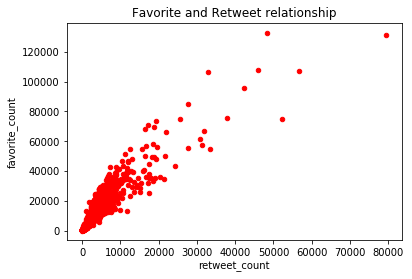

In [94]:
# Scatter plot for both retweet and favorite count to see if there is any correlation exists
final_archive_df.plot(kind='scatter',x='retweet_count',y='favorite_count', color='red')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Favorite and Retweet relationship')

* As the number of retweets increase the favorite counts increase as well

In [95]:
# have insight to rating values given by users and fav count
final_archive_df.groupby('rating_numerator')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_numerator,,,,,,,,
0.0,2.0,13871.000000,15136.327758,3168.0,8519.50,13871.0,19222.50,24574.0
1.0,5.0,5599.800000,5842.605172,152.0,872.00,6072.0,6138.00,14765.0
2.0,9.0,2256.777778,2255.725481,409.0,592.00,1253.0,3155.00,5961.0
3.0,19.0,2395.526316,1776.581435,522.0,1088.00,2009.0,3342.50,7078.0
4.0,16.0,2842.937500,1620.437779,573.0,1125.75,3428.0,3945.75,5346.0
5.0,33.0,3950.424242,8191.521047,111.0,860.00,1930.0,2608.00,46860.0
6.0,32.0,2716.968750,3265.207838,121.0,1027.25,1624.0,2897.00,17618.0
7.0,52.0,3462.173077,4995.736660,113.0,786.75,1687.5,3724.50,26239.0
8.0,95.0,2450.905263,2516.139178,115.0,800.50,1734.0,3454.50,13809.0


In [96]:
# have insight to rating values given by users and retweet count
final_archive_df.groupby('rating_numerator')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_numerator,,,,,,,,
0.0,2.0,1889.500000,2196.980769,336.0,1112.75,1889.5,2666.25,3443.0
1.0,5.0,2512.200000,2708.439163,71.0,431.00,2454.0,2734.00,6871.0
2.0,9.0,1350.333333,1456.291866,127.0,339.00,879.0,1680.00,4485.0
3.0,19.0,952.578947,622.727095,356.0,570.50,710.0,1244.50,2233.0
4.0,16.0,1146.812500,667.548572,340.0,665.75,1058.5,1341.50,2763.0
5.0,33.0,1333.787879,1952.784674,41.0,471.00,748.0,1116.00,10407.0
6.0,32.0,1043.625000,822.472502,47.0,613.75,826.0,1153.00,3444.0
7.0,52.0,1333.019231,2335.901854,44.0,335.00,663.5,1363.00,15043.0
8.0,95.0,904.705263,951.843898,45.0,304.00,597.0,1226.00,5515.0


Text(0.5,1,'Dog Rating distribution')

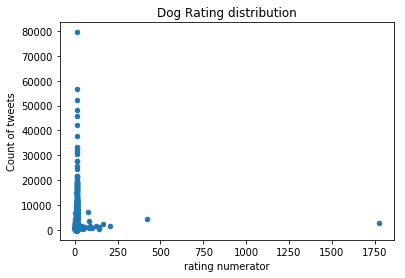

In [100]:
# plot the rating distrbution 
final_archive_df.plot(x='rating_numerator', y='retweet_count', kind='scatter')
plt.xlabel('rating numerator')
plt.ylabel('Count of tweets')
plt.title('Dog Rating distribution')

* The most common rating for the retweeted tweets were equal to 12 with count equal to 450 and mean equal to	3119.80 

Text(0,0.5,'Count of tweets')

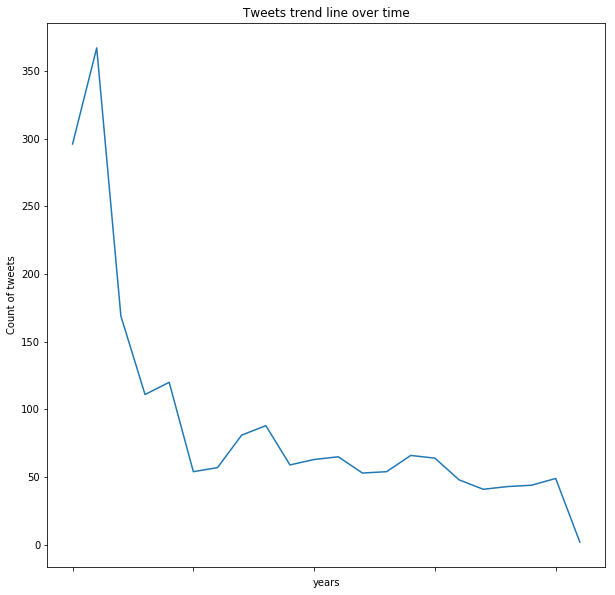

In [98]:
# plot the tweets trend time line
x = final_archive_df.tweet_id.groupby([final_archive_df['timestamp'].dt.year, 
                                       final_archive_df['timestamp'].dt.month]).count()
x.plot('line', figsize=(10, 10), title='Tweets trend line over time');
plt.xlabel('years')
plt.ylabel('Count of tweets')                                 

* The number of tweets about rating dogs is decreasing over time.

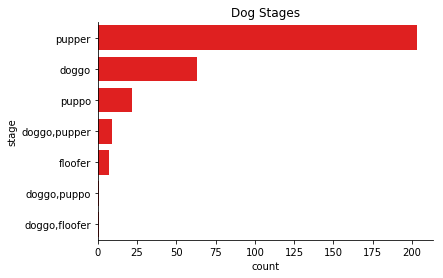

In [99]:
# source: https://www.datacamp.com/community/tutorials/pandas-idiomatic

import seaborn as sns

# select only the 4 stages of dog excluding none
count = final_archive_df['stage'].value_counts()[1:8]

# Convert the stages to a DataFrame 
df = count.to_frame()

# Reset the index 
df.reset_index(level=0, inplace=True)

# Rename the columns
df.columns = ['stage', 'count']

# Plot a bar plot
sns.barplot(x='count', y='stage', data=df, color='r')
sns.despine()

plt.title('Dog Stages')

plt.show()



* The most mentioned dog stage is pupper, then doggo.